In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
# https://docs.wandb.ai/guides/track/public-api-guide#public-api-examples 

import wandb
api = wandb.Api()
run = api.run("test/test")  # docs advise "xmax1/test/test", but this results in error

In [10]:
run.state
for i, row in run.history().iterrows():
      print(row)
      break

_step         1.400000e+01
loss          2.150206e+02
nll           2.144077e+02
_runtime      6.000000e+00
kl_div        6.129143e-01
_timestamp    1.649080e+09
Name: 0, dtype: float64


In [13]:
history = run.scan_history()  # chunks of 500 steps
losses = [row["loss"] for row in history]

,system.network.sent,system.gpu.0.powerPercent,system.network.recv,system.gpu.7.powerWatts,system.gpu.5.temp,system.gpu.2.temp,system.gpu.1.temp,system.gpu.process.7.powerWatts,system.gpu.3.gpu,system.gpu.4.memory,...,system.gpu.2.gpu,system.gpu.5.powerPercent,system.gpu.3.temp,system.gpu.1.powerPercent,system.gpu.2.powerPercent,system.gpu.0.memoryAllocated,_timestamp,system.gpu.7.memory,system.gpu.6.gpu,system.gpu.7.memoryAllocated
0,1041428150,68.13,29391158,49.65,61.73,26,83.09,49.65,98.27,4.82,...,0,51.1,60.18,92.37,0.26,95.8,1649079953,0,97.18,91.95


nemesis-unimatrix-9


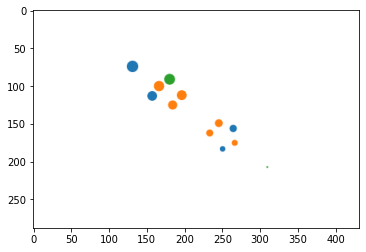

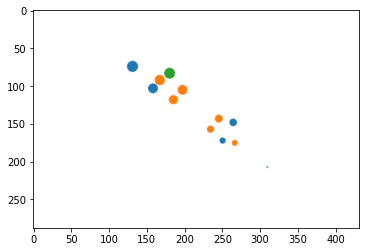

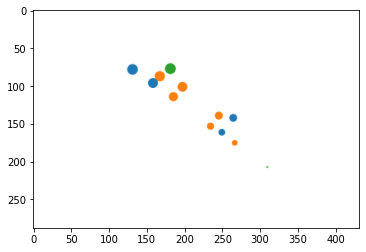

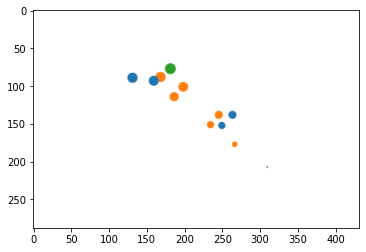

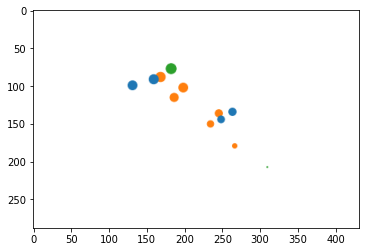

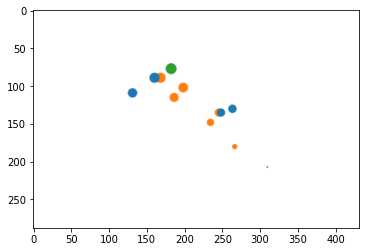

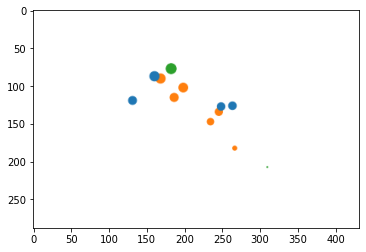

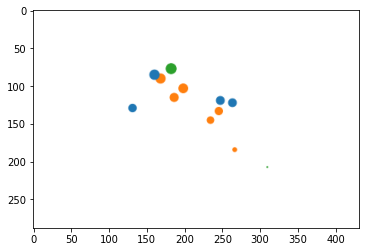

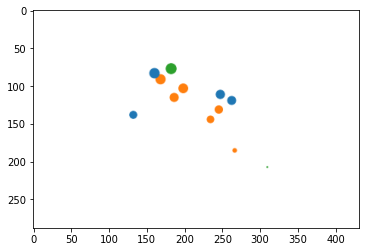

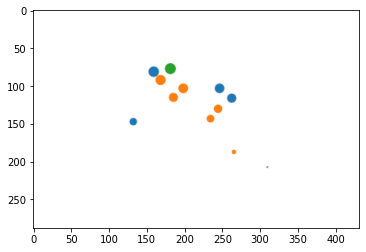

In [15]:
from mol_td.utils import log_video
from mol_td.config import Config
import wandb
import matplotlib.pyplot as plt
import numpy as np

cfg = Config()
data = cfg.load_data('/home/amawi/projects/mol-td/data/uracil_dft.npz')
n_t = 10
n_batch, remainder = divmod(len(data), n_t)
data = data[:-remainder] if remainder > 0 else data
data = data.reshape((n_batch, n_t, -1))

run = wandb.init(project='junk',
                 entity='xmax1')
print(run.name)

with run:
    video = log_video(data[0][..., :-cfg.n_atoms], 'data_video', atoms=data[0, 0, -cfg.n_atoms:])

for im in video:
    plt.imshow(im)
    plt.show()


In [21]:

run = wandb.init(project='junk', entity='xmax1')

with run:
    white = np.ones((10, 4, 10, 10)) * 255
    wandb.log({'white': wandb.Video(white.astype(int), fps=4)})
    black = np.ones((10, 4, 10, 10)) * 0
    wandb.log({'black': wandb.Video(black.astype(int), fps=4)})
    grey = np.ones((10, 4, 10, 10)) * 120
    wandb.log({'grey': wandb.Video(grey.astype(int), fps=4)})
    grey[:, -1, ...] = 50 
    wandb.log({'should_be_faded_grey': wandb.Video(grey.astype(int), fps=4)})
    black[:, -1, ...] = 0 
    wandb.log({'should_be_white': wandb.Video(black.astype(int), fps=4)})
    



In [20]:
run.finish()

0 0
0 (0, 84)


ValueError: cannot reshape array of size 0 into shape (0,5,newaxis)